<a href="https://colab.research.google.com/github/siddchauhan77/Datascience-Projects-Lab/blob/main/ANN_Example_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network using Tensorflow2

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split 
import image

In [2]:
tf.__version__

'2.4.1'

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ANN Practical Example/Dataset/Folds5x2_pp.xlsx')
df.head(2)

X = df.iloc[:, :-1].values #all the columns except the last one
y = df.iloc[:, -1].values #last column as our test column

print(X)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# Build the ANN

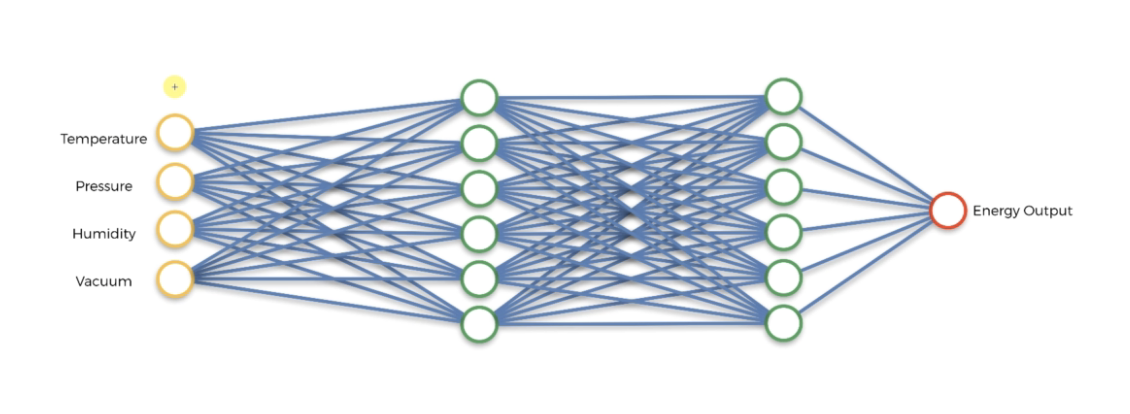

In [4]:
# split the dataset for training and start makingt the ANN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [5]:
ANN = tf.keras.models.Sequential() #from tensorflow call keras to call models and Sequential Class


## Adding the Input Layer

In [6]:
ANN.add(tf.keras.layers.Dense(units=6, activation='relu'))
# add the input layer and 6 units because we have 6 neurons

## Adding Second Layer

In [7]:
ANN.add(tf.keras.layers.Dense(units=6, activation='relu'))
# add the second layer and 6 units because we have 6 neurons

## Adding Output Layer

In [8]:
ANN.add(tf.keras.layers.Dense(units=1, activation=None))
# Adding the output layer | Regression so no activation and 1 output neuron

# Training the Data

## Compiling the ANN

In [9]:
ANN.compile(optimizer= 'adam', loss='mean_squared_error')
#compile the ANN using Adam optimizer and user MSE for loss function

In [10]:
ANN.fit(X_train, y_train, epochs=500, batch_size=32) 
#fit the ANN and use the training vars with epochs and batch size
# the default batch size is 32 to start with

# EPOCH can be made to way less as the loss lowest values were reached pretty early on!

Epoch 1/500
240/240 [==============================] - 1s 1ms/step - loss: 143425.0463
Epoch 2/500
240/240 [==============================] - 0s 1ms/step - loss: 731.0214
Epoch 3/500
240/240 [==============================] - 0s 1ms/step - loss: 504.5696
Epoch 4/500
240/240 [==============================] - 0s 1ms/step - loss: 491.3420
Epoch 5/500
240/240 [==============================] - 0s 1ms/step - loss: 482.5510
Epoch 6/500
240/240 [==============================] - 0s 1ms/step - loss: 450.0587
Epoch 7/500
240/240 [==============================] - 0s 1ms/step - loss: 432.3439
Epoch 8/500
240/240 [==============================] - 0s 1ms/step - loss: 412.5932
Epoch 9/500
240/240 [==============================] - 0s 1ms/step - loss: 381.8320
Epoch 10/500
240/240 [==============================] - 0s 1ms/step - loss: 347.5881
Epoch 11/500
240/240 [==============================] - 0s 1ms/step - loss: 320.5122
Epoch 12/500
240/240 [==============================] - 0s 1ms/step - l

## Predicting on the test set after Traning set

##### Left column is trained and right column in the ANN prediction

In [11]:
y_pred = ANN.predict(X_test)
np.set_printoptions(precision=2) #number of decimals
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #turning from horizontal to vertical

[[441.03 445.26]
 [445.8  448.65]
 [443.62 447.13]
 ...
 [445.82 445.43]
 [458.77 454.06]
 [436.5  434.84]]
